# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf


In [2]:
tips = load_dataset("tips")
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
tip_pct       0
net_bill      0
dtype: int64

In [4]:
data_train = tips[:80]

In [5]:
data_train.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
reg_tip = smf.ols('tip ~ net_bill', data = data_train).fit()
reg_tip.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     81.33
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           9.94e-14
Time:                        22:29:41   Log-Likelihood:                -103.96
No. Observations:                  80   AIC:                             211.9
Df Residuals:                      78   BIC:                             216.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8094      0.264      3.067      0.003       0.284       1.335
net_bill       0.1350      0.015      9.018      0.000       0.105       0.165
==============================================================================
Omnibus:                        6.918   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                8.937
Skew:                          -0.344   Prob(JB):                       0.0115
Kurtosis:                       4.486   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y_tip_pred = reg_tip.predict(data_train["net_bill"])

In [30]:
r2_score(data_train["tip"], y_tip_pred)

0.5104579871640842

In [9]:
y_tip_pred

0     2.966032
1     1.980853
2     3.172515
3     3.558489
4     3.640812
        ...   
75    2.059128
76    2.812182
77    3.940414
78    3.476166
79    2.777094
Length: 80, dtype: float64

<Axes: xlabel='tip'>

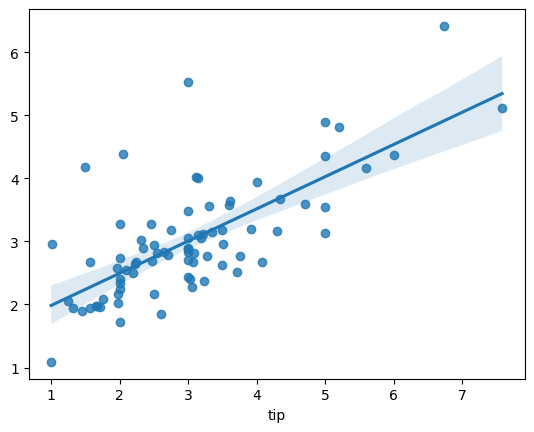

In [10]:
sns.regplot(x=data_train["tip"], y=y_tip_pred)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [12]:
reg_pct = smf.ols('tip_pct ~ net_bill', data = data_train).fit()
reg_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     14.15
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           0.000324
Time:                        22:29:51   Log-Likelihood:                 115.61
No. Observations:                  80   AIC:                            -227.2
Df Residuals:                      78   BIC:                            -222.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2536      0.017     14.950      0.000       0.220       0.287
net_bill      -0.0036      0.001     -3.762      0.000      -0.006      -0.002
==============================================================================
Omnibus:                       18.115   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.000
Skew:                           0.889   Prob(JB):                     5.04e-07
Kurtosis:                       5.354   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y_pred_pctip = reg_pct.predict(data_train["net_bill"])

In [14]:
y_pred_pctip

0     0.195781
1     0.222194
2     0.190245
3     0.179896
4     0.177689
        ...   
75    0.220095
76    0.199905
77    0.169657
78    0.182104
79    0.200846
Length: 80, dtype: float64

<Axes: xlabel='net_bill'>

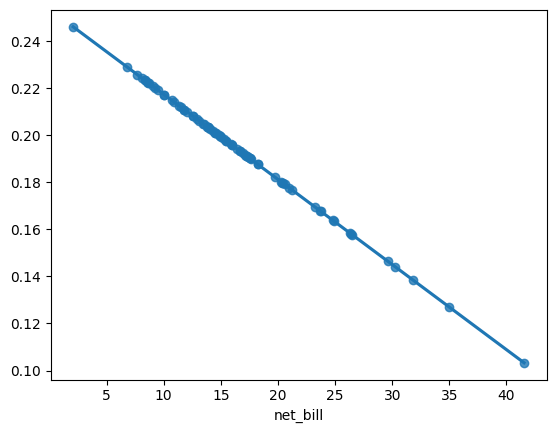

In [15]:
sns.regplot(x=data_train["net_bill"], y=y_pred_pctip, data=tips)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

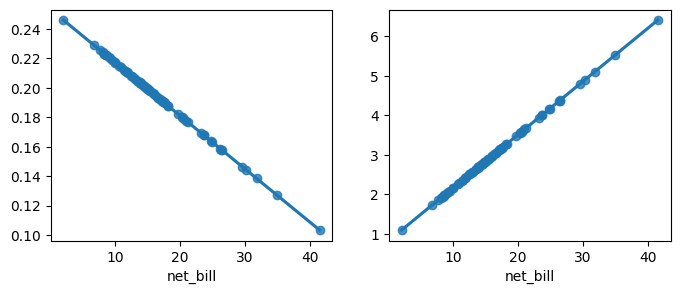

In [23]:
fig, axes = plt.subplots(1,2, figsize=(8,3))

sns.regplot(ax = axes[0], x=data_train["net_bill"], y=y_pred_pctip, data=tips)
sns.regplot(ax = axes[1], x=data_train["net_bill"], y=y_tip_pred)

plt.show()

#### Resposta sobre a relação

- Uma das principais relações entres as duas linhas de regressão é que equanto a conta liquida(``net_bill``) aumenta a gorjeta(``tip``) tede a subir também em quanbto a porcentagem de gorgeta(``tip_pct``) tende a descer, ou seja contas mais autas geram porcentagens de gorjeta menores, em compensação o valor da gorjeta é maior

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

### 1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)

In [21]:
reg_pct.fittedvalues

0     0.195781
1     0.222194
2     0.190245
3     0.179896
4     0.177689
        ...   
75    0.220095
76    0.199905
77    0.169657
78    0.182104
79    0.200846
Length: 80, dtype: float64

### 2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```

In [25]:
reg = smf.ols('tip ~ tip_pct * net_bill', data = data_train).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     81.33
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           9.94e-14
Time:                        00:22:10   Log-Likelihood:                -103.96
No. Observations:                  80   AIC:                             211.9
Df Residuals:                      78   BIC:                             216.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8094      0.264      3.067      0.003       0.284       1.335
net_bill       0.1350      0.015      9.018      0.000       0.105       0.165
==============================================================================
Omnibus:                        6.918   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                8.937
Skew:                          -0.344   Prob(JB):                       0.0115
Kurtosis:                       4.486   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred_tip = reg.predict(tips[["net_bill", "tip_pct"]])

In [32]:
pred_tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64

### 3. calcule o $R^2$ do modelo para ```tip```


In [29]:
r2_score(tips["tip"],pred_tip )

1.0

### 4. compare esse $R^2$ com o do item 1

In [45]:
print(f"r-quadrado do item 1 = {r2_score(data_train['tip'], y_tip_pred)} \n"
      "--------------------------------------------------------------------\n"
      f"r-quadrado de tip_pct*net_bill = {r2_score(tips['tip'],pred_tip)}")

r-quadrado do item 1 = 0.5104579871640842 
--------------------------------------------------------------------
r-quadrado de tip_pct*net_bill = 1.0
